# Plotting of reproduction results
In this notebook you can find plotting functions that parse the results from a `run_all_results_<date>.csv` file.
This csv results file can be obtained by running the main package function with the `run-all` argument on a folder of experiments. 

Example:
```
xwalk_reprod --run-all experiments/param_sweep
```
For more information see instructions in the main README.md file.

In [321]:
import pandas as pd
import matplotlib.pyplot as plt

# specify the file to plot here
filepath = "../data/experimental_results/all_original_experiments_results.csv"

df = pd.read_csv(filepath, sep=';', index_col=0)
df.sort_values(by='weighting_method', inplace=True)

In [322]:
# example arguments for file, if your experiments folder contained experiments with these 
# options it will plot them.
task = 'nodeclass'
dataset = 'rice'
metric = "mean_accuracy"
metric_2 = "mean_disparity"
emb_method = "deepwalk"

# plotting function 
def plot_df(task, dataset, metric, metric_2, emb_method, scale_m1=False):
       res_metric_1 = df.loc[(df['task'] == task) & 
              (df['dataset'] == dataset) & 
              (df['metric'] == metric) & 
              (df['embedding_method'] == emb_method)][['weighting_method', 'value']]

       # std
       std_metric_1 = "std_" + "_".join(metric.split("_")[1:])
       res_metric_1_std = df.loc[(df['task'] == task) & 
              (df['dataset'] == dataset) & 
              (df['metric'] == std_metric_1) & 
              (df['embedding_method'] == emb_method)][['weighting_method', 'value']]
       res_metric_1_std = res_metric_1_std.rename(columns={'value': metric})

       #######################
       res_metric_2 = df.loc[(df['task'] == task) & 
              (df['dataset'] == dataset) & 
              (df['metric'] == metric_2) & 
              (df['embedding_method'] == emb_method)][['weighting_method', 'value']]

       std_metric_2 = "std_" + "_".join(metric_2.split("_")[1:])
       res_metric_2_std = df.loc[(df['task'] == task) & 
              (df['dataset'] == dataset) & 
              (df['metric'] == std_metric_2) & 
              (df['embedding_method'] == emb_method)][['weighting_method', 'value']]

       res_metric_2_std = res_metric_2_std.rename(columns={'value': metric_2})

       res_metric_1 = res_metric_1.rename(columns={'value': 'accuracy'})
       if scale_m1:
              res_metric_1['accuracy'] = res_metric_1['accuracy'] * 100

       res_metric_2 = res_metric_2.rename(columns={'value': 'disparity'})
       # to_plot_errors = res_metric_1_std.merge(res_metric_2_std, on='weighting_method').iloc[::-1]

       
       to_plot = res_metric_1.merge(res_metric_2, on='weighting_method').iloc[::-1]
       # to_plot.merge(to_plot_errors, on='weighting_method')
       
       to_plot_errors = [res_metric_1_std[metric].iloc[::-1], res_metric_2_std[metric_2].iloc[::-1]]

       naming_dict = {
              "skip": "DeepWalk",
              "fairwalk": "FairWalk",
              "crosswalk": "CrossWalk"
       }

       to_plot['weighting_method'] = to_plot['weighting_method'].replace(naming_dict)

       if task == 'infmax':
              to_plot = to_plot.rename(columns={"accuracy": 'Influence'})

              # to_plot.plot.bar(x='weighting_method', ylabel=metric, yerr=to_plot_errors, rot=0, xlabel='')
              ax = to_plot.plot.bar(x='weighting_method', yerr=to_plot_errors, rot=0, xlabel='')
              # plt.savefig(f'{task}_{dataset}.png')
              y_max = float(max(to_plot['Influence'].max(), to_plot['disparity'].max()))
              y_max += max(to_plot_errors[0].max(), to_plot_errors[1].max()) * 1.2

       else:
              # to_plot.plot.bar(x='weighting_method', ylabel=metric, yerr=to_plot_errors, rot=0, xlabel='')
              ax = to_plot.plot.bar(x='weighting_method', yerr=to_plot_errors, rot=0, xlabel='')
              # plt.savefig(f'{task}_{dataset}.png')
              y_max = float(max(to_plot['accuracy'].max(), to_plot['disparity'].max()))
              y_max += max(to_plot_errors[0].max(), to_plot_errors[1].max()) * 1.2
       
       ax.set_ylim(0, y_max)

# plot_df(task, dataset, metric, metric_2, emb_method)

# Reproduction Results

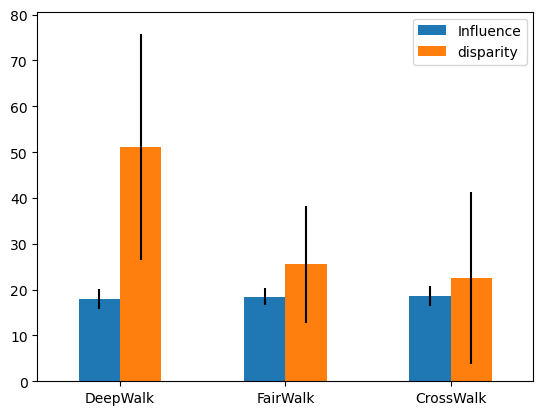

In [323]:
plot_df('infmax', 'rice', 'mean_infected_nodes_fraction', 'mean_disparity', 'deepwalk')

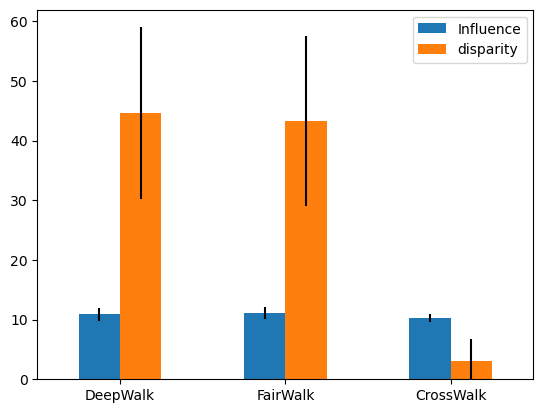

In [324]:
plot_df('infmax', 'synthetic2', 'mean_infected_nodes_fraction', 'mean_disparity', 'deepwalk')

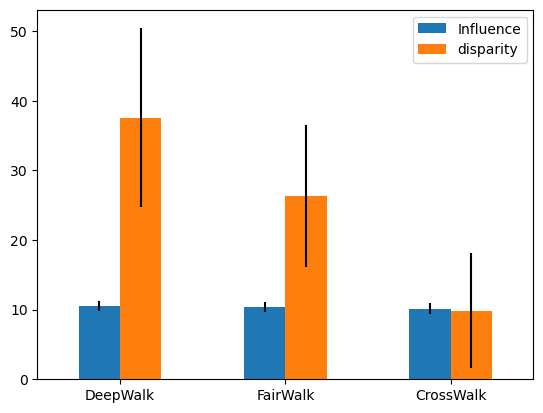

In [325]:
plot_df('infmax', 'synthetic3', 'mean_infected_nodes_fraction', 'mean_disparity', 'deepwalk')

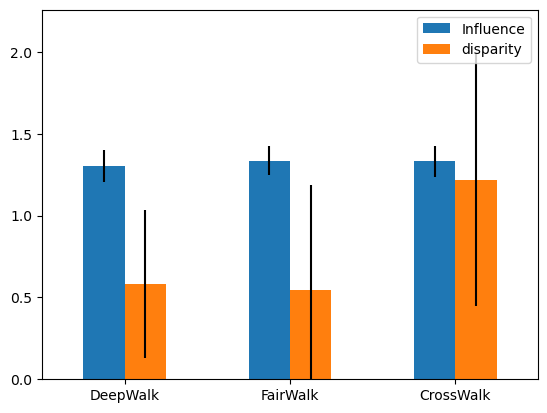

In [326]:
plot_df('infmax', 'twitter', 'mean_infected_nodes_fraction', 'mean_disparity', 'deepwalk')

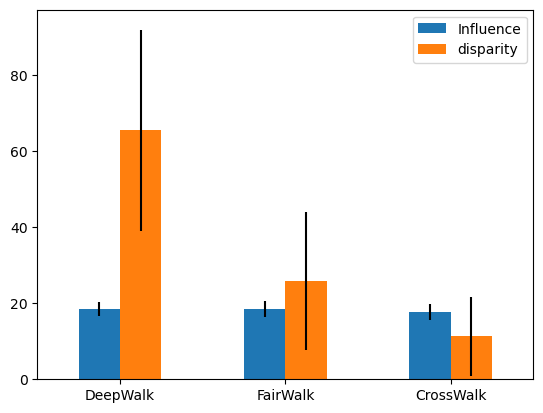

In [327]:
plot_df('infmax', 'rice', 'mean_infected_nodes_fraction', 'mean_disparity', 'node2vec')

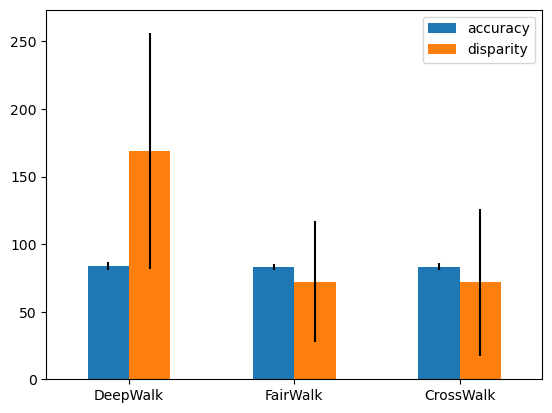

In [328]:
plot_df('nodeclass', 'rice', 'mean_accuracy', 'mean_disparity', 'deepwalk')

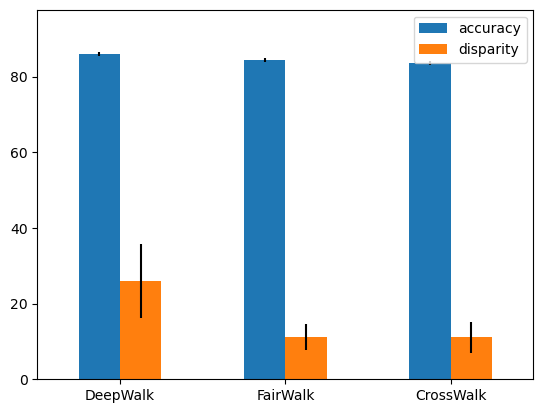

In [329]:
plot_df('linkpred', 'rice', 'mean_accuracy', 'mean_disparity', 'deepwalk')

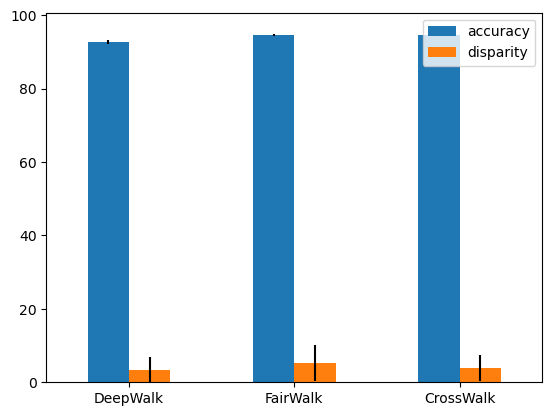

In [330]:
plot_df('linkpred', 'twitter', 'mean_accuracy', 'mean_disparity', 'deepwalk')

# Parameter sweep results
Results for crosswalk parameter sweeps.


In [375]:
# file for hyperparameter sweep
filepath = "../data/experimental_results/sweep_alpha.csv"
df = pd.read_csv(filepath, sep=';', index_col=0)


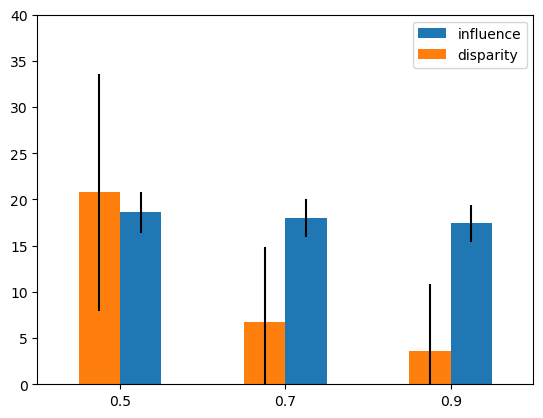

In [376]:
df['extra'] = df['extra'].apply(lambda x: x.replace("0", "0."))
df['extra'] = df['extra'].apply(lambda x: x.split("_")[-1])

def plot_param_sweep(task, dataset, metric, metric_2, emb_method, ymax=100, reverse_columns=False):
    df_local = df.copy()
    
    res_metric_1 = df_local.loc[(df_local['task'] == task) & 
        (df_local['dataset'] == dataset) & 
        (df_local['metric'] == metric) & 
        (df_local['embedding_method'] == emb_method)][['weighting_method', 'value', 'extra']]

    res_metric_1 = res_metric_1.rename(columns={'value': 'accuracy'})
    # std
    std_metric_1 = "std_" + "_".join(metric.split("_")[1:])
    res_metric_1_std = df.loc[(df_local['task'] == task) & 
            (df_local['dataset'] == dataset) & 
            (df_local['metric'] == std_metric_1) & 
            (df_local['embedding_method'] == emb_method)][['weighting_method', 'value', 'extra']]

    res_metric_1_std = res_metric_1_std.rename(columns={'value': metric})
    #######################
    res_metric_2 = df_local.loc[(df_local['task'] == task) & 
        (df_local['dataset'] == dataset) & 
        (df_local['metric'] == metric_2) & 
        (df_local['embedding_method'] == emb_method)][['weighting_method', 'value', 'extra']]

    res_metric_2 = res_metric_2.rename(columns={'value': 'disparity'})
    # std
    std_metric_2 = "std_" + "_".join(metric_2.split("_")[1:])

    res_metric_2_std = df_local.loc[(df_local['task'] == task) & 
            (df_local['dataset'] == dataset) & 
            (df_local['metric'] == std_metric_2) & 
            (df_local['embedding_method'] == emb_method)][['weighting_method', 'value', 'extra']]

    res_metric_2_std = res_metric_2_std.rename(columns={'value': metric_2})

    to_plot = res_metric_1.merge(res_metric_2, on='extra').iloc[::-1]
    to_plot_errors = [res_metric_1_std[metric].iloc[::-1], res_metric_2_std[metric_2].iloc[::-1]]

    if task == 'infmax':
              to_plot = to_plot.rename(columns={"accuracy": 'influence'})

    ax = to_plot.plot.bar(x='extra', yerr=to_plot_errors, rot=0, xlabel='')
    ax.set_ylim(0, ymax)
    plt.gca().invert_xaxis()
    # plt.savefig(f'{task}_{dataset}.png')

plot_param_sweep('infmax', 'rice', 'mean_infected_nodes_fraction', 'mean_disparity', 'deepwalk', ymax=40, reverse_columns=True)

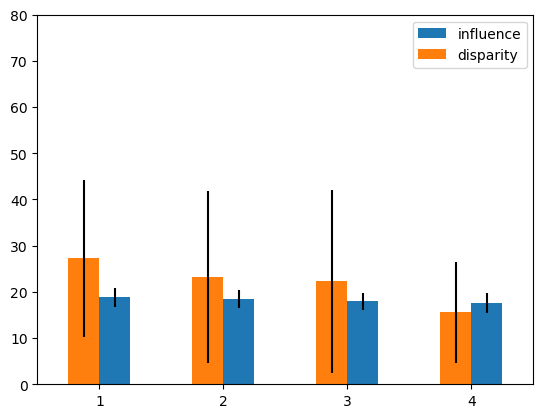

In [377]:
filepath = "../data/experimental_results/sweep_p.csv"
df = pd.read_csv(filepath, sep=';', index_col=0)
df['extra'] = df['extra'].apply(lambda x: x.split("_")[-1])

plot_param_sweep('infmax', 'rice', 'mean_infected_nodes_fraction', 'mean_disparity', 'deepwalk', ymax=80, reverse_columns=True)

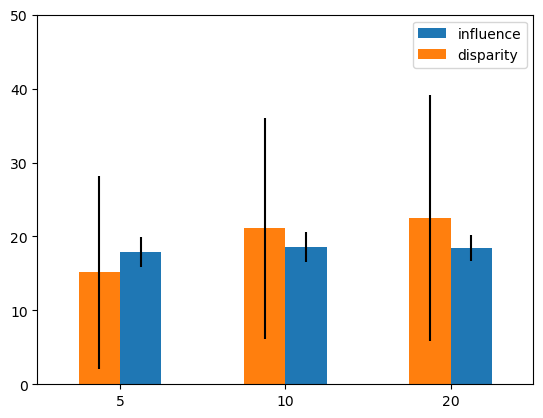

In [378]:
filepath = "../data/experimental_results/sweep_walk_length.csv"
df = pd.read_csv(filepath, sep=';', index_col=0)
df['extra'] = df['extra'].apply(lambda x: int(x.split("_")[1]))
df.sort_values(by='extra', inplace=True)

plot_param_sweep('infmax', 'rice', 'mean_infected_nodes_fraction', 'mean_disparity', 'deepwalk', ymax=50, reverse_columns=True)

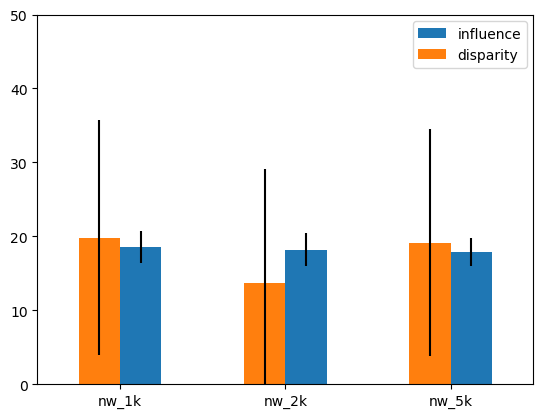

In [379]:
filepath = "../data/experimental_results/sweep_walks_per_node.csv"
df = pd.read_csv(filepath, sep=';', index_col=0)

plot_param_sweep('infmax', 'rice', 'mean_infected_nodes_fraction', 'mean_disparity', 'deepwalk', ymax=50, reverse_columns=True)

# Comparison of crosswalk implementations

In [349]:
filepath = "../data/experimental_results/crosswalk_implementation_comparison.csv"
df = pd.read_csv(filepath, sep=';', index_col=0)

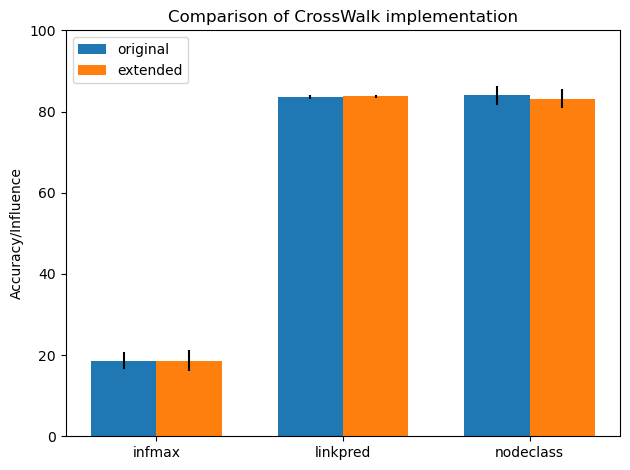

In [355]:
import matplotlib.pyplot as plt
import numpy as np


task = ['infmax', 'linkpred', 'nodeclass']
# accuracies
means_original = list(df.loc[((df['metric'] == 'mean_accuracy') | 
    (df['metric'] == 'mean_infected_nodes_fraction')) &
    (df['extra'] == 'original_crosswalk')]['value'])
std_original = list(df.loc[((df['metric'] == 'std_accuracy') | 
    (df['metric'] == 'std_infected_nodes_fraction')) &
    (df['extra'] == 'original_crosswalk')]['value'])
means_extended = list(df.loc[((df['metric'] == 'mean_accuracy') | 
    (df['metric'] == 'mean_infected_nodes_fraction')) &
    (df['extra'] == 'extended_crosswalk')]['value'])
std_extended = list(df.loc[((df['metric'] == 'std_accuracy') | 
    (df['metric'] == 'std_infected_nodes_fraction')) &
    (df['extra'] == 'extended_crosswalk')]['value'])

x = np.arange(len(task))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means_original, width, label='original', yerr=std_original)
rects2 = ax.bar(x + width/2, means_extended, width, label='extended', yerr=std_extended)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy/Influence')
ax.set_title("Comparison of CrossWalk implementation")
ax.set_xticks(x, task)
ax.legend(loc='upper left')

ax.set_ylim(0,100)
fig.tight_layout()

plt.show()

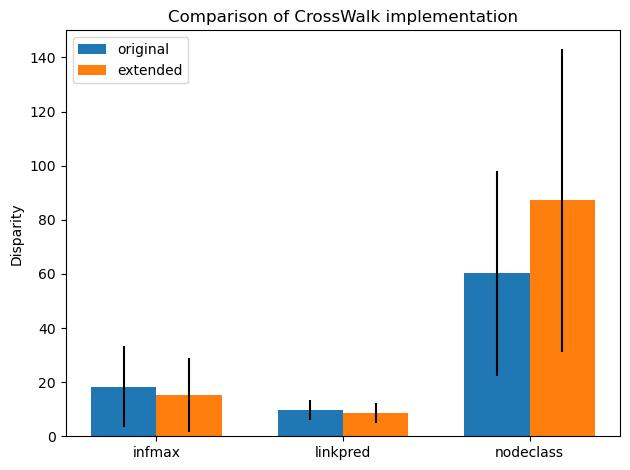

In [356]:
import matplotlib.pyplot as plt
import numpy as np


task = ['infmax', 'linkpred', 'nodeclass']
# accuracies
means_original = list(df.loc[(df['metric'] == 'mean_disparity') &
    (df['extra'] == 'original_crosswalk')]['value'])
std_original = list(df.loc[(df['metric'] == 'std_disparity') &
    (df['extra'] == 'original_crosswalk')]['value'])

means_extended = list(df.loc[(df['metric'] == 'mean_disparity') &
    (df['extra'] == 'extended_crosswalk')]['value'])
std_extended = list(df.loc[(df['metric'] == 'std_disparity') &
    (df['extra'] == 'extended_crosswalk')]['value'])

x = np.arange(len(task))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means_original, width, label='original', yerr=std_original)
rects2 = ax.bar(x + width/2, means_extended, width, label='extended', yerr=std_extended)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Disparity')
ax.set_title("Comparison of CrossWalk implementation")
ax.set_xticks(x, task)
ax.legend(loc='upper left')


ax.set_ylim(0,150)
fig.tight_layout()

plt.show()